# Modeling Phase

### Load Python modules

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('ggplot')

In [2]:
dt_cleaned = pd.read_csv('dt_cleaned.csv', sep=',')
dt_cleaned

,age_cat,ethnicity,is_recid,score_text,sex
0,senior,Other,0,Low,Male
1,adult,African-American,1,Low,Male
2,young,African-American,1,Low,Male
3,young,African-American,0,High,Male
4,adult,Other,0,Low,Male
...,...,...,...,...,...
11022,senior,Other,0,Low,Male
11023,young,Caucasian,1,Medium,Male
11024,adult,Other,0,Low,Male
11025,adult,Caucasian,0,Low,Male


In [3]:
dt_cleaned_v = pd.read_csv('dt_cleaned_v.csv', sep=',')
dt_cleaned_v

,age_cat,ethnicity,is_violent_recid,sex,v_score_text
0,adult,African-American,1,Male,Low
1,young,African-American,0,Male,Low
2,adult,Caucasian,0,Male,Low
3,young,Caucasian,1,Male,Medium
4,young,African-American,0,Male,Low
...,...,...,...,...,...
3696,young,Caucasian,0,Female,Low
3697,adult,Caucasian,0,Male,Low
3698,young,African-American,0,Male,Medium
3699,senior,African-American,0,Male,Low


In [4]:
dt_date_r = pd.read_csv('dt_date_r.csv', sep=',')
dt_date_r

,age_cat,dates_diff_in_days,ethnicity,score_text,sex
0,adult,160,African-American,Low,Male
1,young,64,African-American,Low,Male
2,adult,41,Caucasian,Medium,Male
3,young,736,Caucasian,Low,Male
4,young,128,African-American,Medium,Male
...,...,...,...,...,...
3088,senior,286,African-American,Medium,Male
3089,young,296,Caucasian,Low,Female
3090,young,9,African-American,Low,Male
3091,senior,30,African-American,Low,Male


In [5]:
dt_date_v = pd.read_csv('dt_date_v.csv', sep=',')
dt_date_v

,age_cat,dates_diff_in_days,ethnicity,sex,v_score_text
0,adult,160,African-American,Male,Low
1,young,736,Caucasian,Male,Medium
2,adult,242,Caucasian,Male,Low
3,adult,659,African-American,Male,Low
4,adult,296,African-American,Male,Medium
...,...,...,...,...,...
723,young,217,African-American,Male,Medium
724,adult,252,African-American,Male,Low
725,adult,926,African-American,Male,Medium
726,senior,741,African-American,Male,High


### Check Attribute types

In [6]:
dt_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age_cat     11027 non-null  object
 1   ethnicity   11027 non-null  object
 2   is_recid    11027 non-null  int64 
 3   score_text  11027 non-null  object
 4   sex         11027 non-null  object
dtypes: int64(1), object(4)
memory usage: 430.9+ KB


In [7]:
dt_cleaned['age_cat'] = dt_cleaned['age_cat'].astype('category')
dt_cleaned['ethnicity'] = dt_cleaned['ethnicity'].astype('category')
dt_cleaned['score_text'] = dt_cleaned['score_text'].astype('category')
dt_cleaned['sex'] = dt_cleaned['sex'].astype('category')
dt_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age_cat     11027 non-null  category
 1   ethnicity   11027 non-null  category
 2   is_recid    11027 non-null  int64   
 3   score_text  11027 non-null  category
 4   sex         11027 non-null  category
dtypes: category(4), int64(1)
memory usage: 129.9 KB


#### Add dummies instead of categorical attributes

In [8]:
number = preprocessing.LabelEncoder()
for attribute in dt_cleaned.columns:
    if dt_cleaned[attribute].dtype.name == "category":
        dt_cleaned[attribute] = number.fit_transform(dt_cleaned[attribute])

### Check if the dataset is balanced

In [9]:
dt_cleaned['is_recid'].value_counts()

0    7326
1    3701
Name: is_recid, dtype: int64

Resample Algorithm is needed.

### Split Dataset into Training Set and Test Set

In [10]:
X = dt_cleaned.drop('is_recid', axis=1)
y = dt_cleaned['is_recid']

seed = 121
test_size= 0.25
# 75% train set, 25% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

training_set = pd.concat([X_train, y_train], axis=1)
recid = training_set[training_set.is_recid==1]
not_recid = training_set[training_set.is_recid==0]

In [11]:
recid.shape

(2776, 5)

In [12]:
not_recid.shape

(5494, 5)

#### Perform Undersampling

In [13]:
from sklearn.utils import resample

In [14]:
not_recid_resampled = resample(not_recid, replace = True, n_samples=int(len(recid)), random_state=seed) #n_samples=int(len(recid)*1.3

dt_resampled = pd.concat([recid, not_recid_resampled])

X_train = dt_resampled.drop("is_recid", axis=1)
y_train = dt_resampled['is_recid']

In [15]:
dt_resampled.is_recid.value_counts()

1    2776
0    2776
Name: is_recid, dtype: int64

#### Build different models and evaluate them using three metrics: *accuracy*, *recall* and *precision*

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

#### Find the best parameters

##### Decision Tree

In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_leaf_nodes': [None, 5, 10, 15],
    'random_state': [None, 1, 2, 3, 4, 5]
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 15, 'random_state': None, 'splitter': 'random'}


In [18]:
knn_params = {
    'n_neighbors':  [1, 2, 3, 4, 5]
}

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

knn.fit(X_train, y_train)
print(knn.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 2}


In [19]:
rf_params = {
    'random_state':  [10, 20, 30, 40, 50]
}

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

rf.fit(X_train, y_train)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'random_state': 30}


In [20]:
ab_params = {
    'random_state':  [110, 120, 130, 140, 150]
}

ab = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=ab_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

ab.fit(X_train, y_train)
print(ab.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'random_state': 110}


In [21]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier(criterion="gini", splitter="random", random_state=5, max_depth=None, max_leaf_nodes=15)))
models.append(("KNeighborsClassifier", KNeighborsClassifier(2)))
models.append(("Random Forest", RandomForestClassifier(random_state=30)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=110)))

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(f'{name}:\n')
  print(f'Accuracy: {metrics.accuracy_score(y_test, predictions):.4f}')
  print(f'Recall: {metrics.recall_score(y_test, predictions):.4f}')
  print(f'Precision: {metrics.precision_score(y_test, predictions):.4f}')
  print(f'F-measure: {metrics.f1_score(y_test, predictions):.4f}\n')

Naive Bayes:

Accuracy: 0.5934
Recall: 0.6670
Precision: 0.4315
F-measure: 0.5240

DecisionTreeClassifier:

Accuracy: 0.6402
Recall: 0.5816
Precision: 0.4707
F-measure: 0.5203

KNeighborsClassifier:

Accuracy: 0.3442
Recall: 0.9903
Precision: 0.3374
F-measure: 0.5033

Random Forest:

Accuracy: 0.6380
Recall: 0.6151
Precision: 0.4699
F-measure: 0.5328

AdaBoost:

Accuracy: 0.6369
Recall: 0.5838
Precision: 0.4671
F-measure: 0.5190



### Evaluation - Random Forest

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.64


In [24]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Confusion Matrix

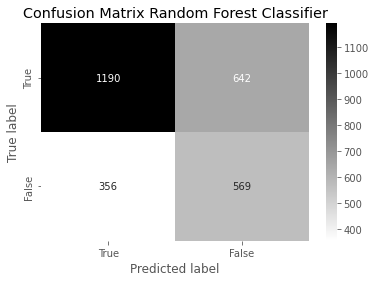

In [119]:
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary', title='Confusion Matrix Random Forest Classifier')

#### Classification Report

In [29]:
print("Classification Report - Random Forest Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1832
           1       0.47      0.62      0.53       925

    accuracy                           0.64      2757
   macro avg       0.62      0.63      0.62      2757
weighted avg       0.67      0.64      0.65      2757



### Evaluation - Ada Boost

In [30]:
model = AdaBoostClassifier(random_state=110)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.64


#### Confusion Matrix

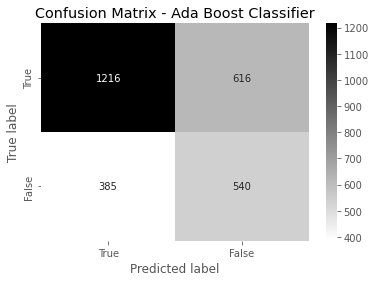

In [31]:
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary', title='Confusion Matrix - Ada Boost Classifier')

#### Classification Report

In [32]:
print("Classification Report - Ada Boost Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1832
           1       0.47      0.58      0.52       925

    accuracy                           0.64      2757
   macro avg       0.61      0.62      0.61      2757
weighted avg       0.66      0.64      0.64      2757



#### ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc

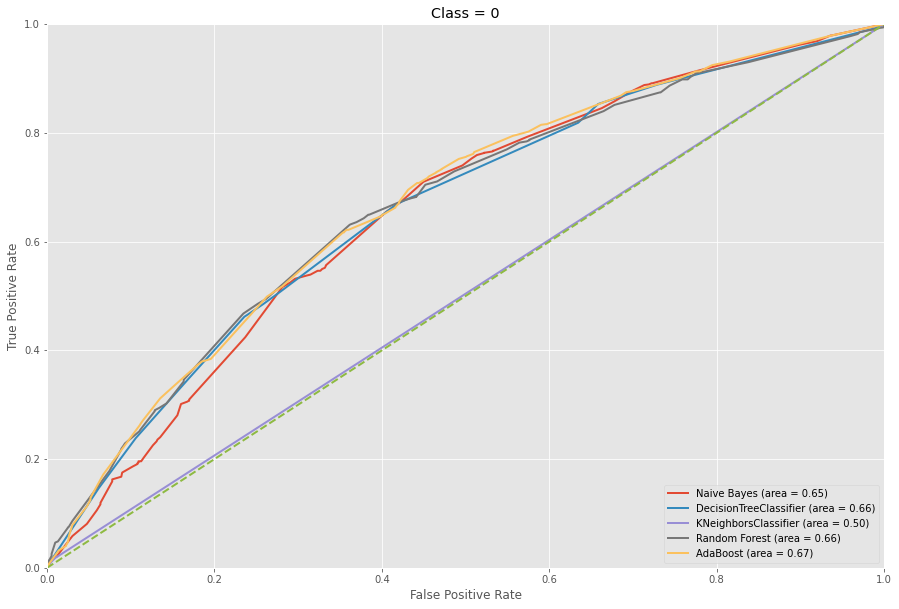

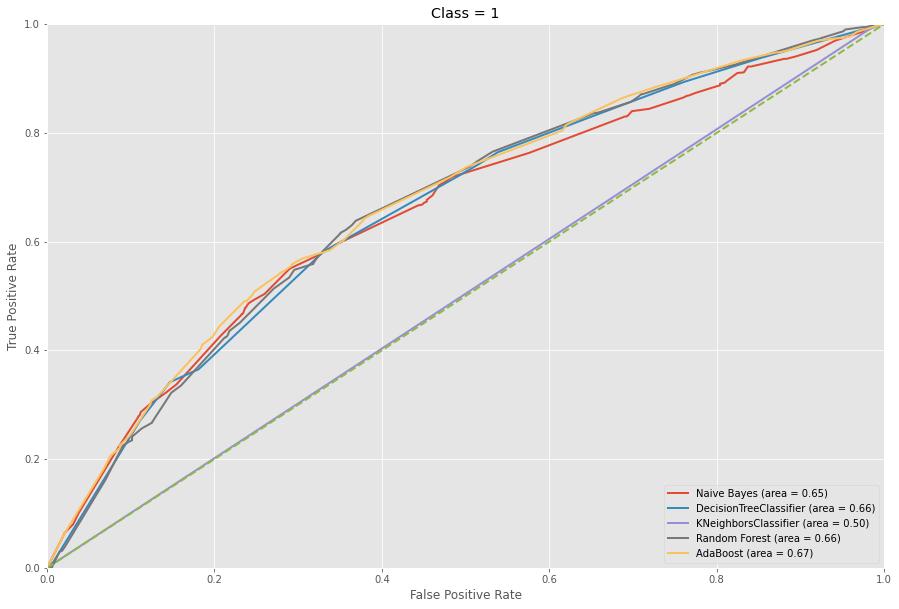

In [117]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['is_recid']))

probs = []

for _, model in models:
    model.fit(X_train, y_train)
    probs.append(model.predict_proba(X_test))
    
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure(figsize=(15,10))
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()